In [9]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [10]:
#Uploading data using False low_memory to detect and handle different types of inputs in the columns
#A copy of the raw data file is used to prevent damage of original information
roads= pd.read_csv("/Users/precupada/Advanced-Simulation---Group-12/data/_roads_1.tsv", sep='\t', low_memory=False)
bridges=pd.read_excel("/Users/precupada/Advanced-Simulation---Group-12/data/BMMS_overview_1.xlsx")

# Roads file: Resolving Distances between LRP points

This part of the code will focus on the _"_roads.tsv"_ file and implement a solution to eliminate noise from the data and ultimately improve the simulation output. 

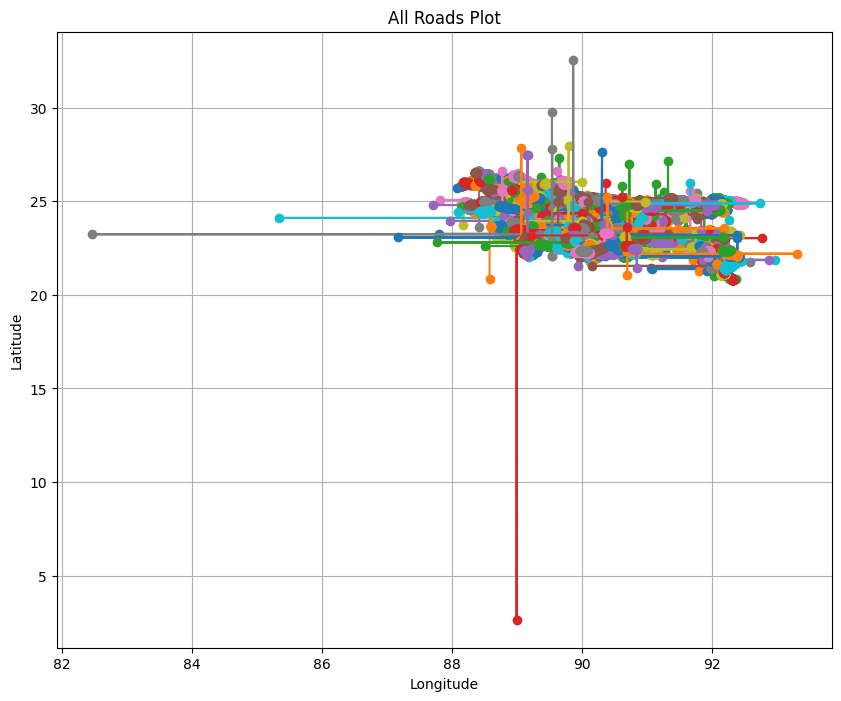

In [11]:
# Vizualizing the data
# Create a plot
plt.figure(figsize=(10, 8))

# Loop through each row in the dataframe (each road)
for index, row in roads.iterrows():
    # Extract the name of the road (first column)
    road_name = row.iloc[0]
    
    # Extract latitude and longitude values from the row
    latitudes = []
    longitudes = []
    
    # Extract latitude and longitude for each LRP, assuming columns are in a pattern
    for i in range(1, len(row), 3):  # every 3rd column is latitude and longitude
        latitudes.append(row.iloc[i+1])   # Column i+1 is latitude
        longitudes.append(row.iloc[i+2])  # Column i+2 is longitude
    
    # Plot the road (connecting the points)
    plt.plot(longitudes, latitudes, marker='o', label=f'{road_name}')

# Customize the plot
plt.title('All Roads Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)


# Show the plot
plt.show()

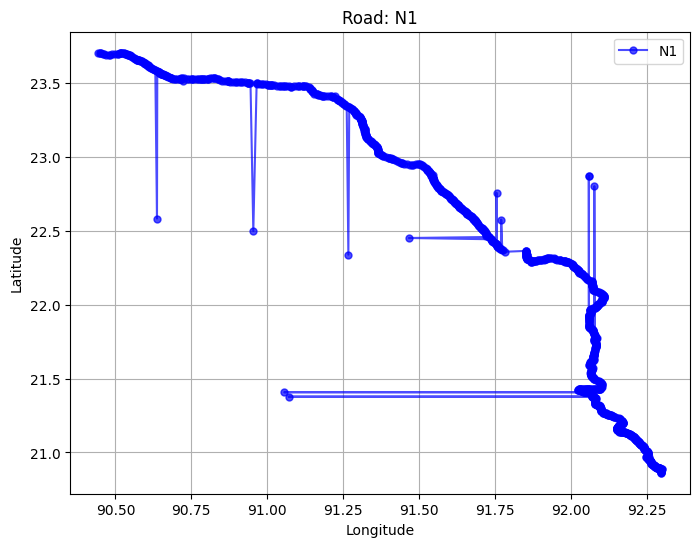

In [12]:
# Zooming into one road to take a closer look at the outliers shown in the "All roads plot" 
# Select the first row from the dataframe
row = roads.iloc[0]

# Extract the name of the road (first column)
road_name = row.iloc[0]

# Extract latitude and longitude values from the row
latitudes = []
longitudes = []

# Extract latitude and longitude for each LRP
for i in range(1, len(row), 3):  # every 3rd column is latitude and longitude
    latitudes.append(row.iloc[i+1])   # Column i+1 is latitude
    longitudes.append(row.iloc[i+2])  # Column i+2 is longitude

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the road (first row)
plt.plot(longitudes, latitudes, marker='o', markersize=5, linestyle='-', color='blue', alpha=0.7, label=f'{road_name}')

# Customize the plot
plt.title(f'Road: {road_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

## Creating a distance function
To clean up the roads.tsv file and ensure continuity of the roads, we have to eliminate outliers amongst the LRPs for each road. To do this, we create a function that calculates the distances between the LRPs of one specific road, hoeping to eventually eliminate those LRPs that deviate too much from the average distance.

In [ ]:
#defining the function
